In [4]:
!pip install faker




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from faker import Faker
import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv("Mall_Customers.csv")
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


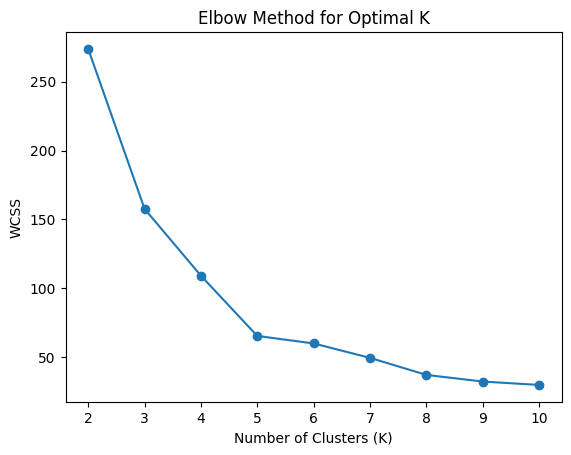

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [12]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.397
K=3, Silhouette Score=0.467
K=4, Silhouette Score=0.494
K=5, Silhouette Score=0.555
K=6, Silhouette Score=0.514
K=7, Silhouette Score=0.502
K=8, Silhouette Score=0.455
K=9, Silhouette Score=0.457
K=10, Silhouette Score=0.445


In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [16]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043


In [18]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='Cluster',
    title='Customer Segmentation using K-Means',
    hover_data=['Age', 'Genre']
)

fig.show()


In [19]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)

pca_df['Cluster'] = df['Cluster']


In [20]:
import plotly.express as px

fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Cluster',
    title='PCA Visualization of Customer Segments'
)

fig.show()


In [21]:
cluster_summary = df.groupby('Cluster')[
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
].mean()

cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [22]:
df['Cluster'].value_counts()


,count
Cluster,
0,81
1,39
3,35
4,23
2,22


In [23]:
gender_dist = (
    df.groupby('Cluster')['Genre']
    .value_counts(normalize=True) * 100
)

gender_dist


Cluster  Genre 
0        Female    59.259259
         Male      40.740741
1        Female    53.846154
         Male      46.153846
2        Female    59.090909
         Male      40.909091
3        Male      54.285714
         Female    45.714286
4        Female    60.869565
         Male      39.130435
Name: proportion, dtype: float64

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


In [25]:
df['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
0,195
-1,5


In [26]:
fig = px.scatter(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='DBSCAN_Cluster',
    title='DBSCAN Customer Segmentation'
)

fig.show()
